# Assignment - PART 2 due Jan 27 - Gradient Descent

The goal of this assignment is to write code that does gradient descent for linear regression. Here are the parts

- Q1 Warm Up
- Paste in your code from last time and rerun it to store the variables
- Q2 Write a function that does gradient descent
- Q3 Use linear regretion to predict Life Expectancy - new data set!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 - Warm Up

- Write code that creates a 100 x 2 matrix filled with random floatsa between 0-100 and prints the last 10 rows
- Make a scatter plot of the data that you just created.
- Find the average values of each of the columns.
- Make a scatter plot of the data where you plot values of y<50 in red and y>=50 in blue

In [2]:
# Fill a 100 X 2 np.array with random numbers (floats) and print the last 10 rows
rando = 100 * np.random.ranf((100,2)) #A 100x2 matrix filled with values between 0-100
last_ten = rando[(100-10):,:] #Grabs the last ten values in both columns
print(last_ten.shape)
print(last_ten)

(10, 2)
[[11.18703527 78.95019239]
 [73.18087374 58.18415647]
 [13.46878741 62.2518628 ]
 [ 0.7539199   1.52714912]
 [96.38699755 81.56117759]
 [67.03080003  2.18884407]
 [86.63892303 73.91688069]
 [61.11929607 53.12060805]
 [58.09776606 95.61400121]
 [11.50079794 45.65779027]]


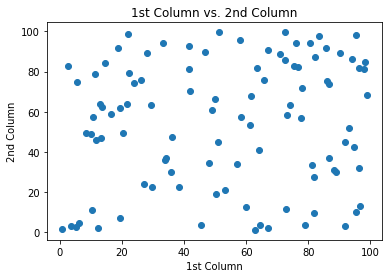

In [3]:
# Make a scatter plot of the random data where x is the first column and y is the second column of your random data
x = rando[:,0] #Column 1
y = rando[:,1] #Column 2
plt.plot(x, y, 'o')
plt.xlabel('1st Column')
plt.ylabel('2nd Column')
plt.title('1st Column vs. 2nd Column')

plt.show()

In [4]:
# Find the average values of each of the columns in your random data
AverageX = x.mean() #Find the mean of all the values in x
AverageY = y.mean() #Find the mean of all the values in y

print('Average of First Column: ', AverageX)
print('Average of Second Column: ', AverageY)

print(x.shape, y.shape)

Average of First Column:  53.10811031573835
Average of Second Column:  54.174682034982595
(100,) (100,)


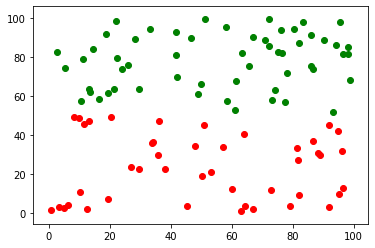

In [5]:
# Make a plot of your data such that if the y-value is less that 50 the color is red 
# and more than or equal to 50 the color is green
for i in range(len(y)): 
    if(y[i] < 50): #if the y value < 50
        plt.scatter(x[i], y[i], color = 'r') #Mark the points red
    elif(y[i] >= 50): #if the y value >= 50
        plt.scatter(x[i], y[i], color = 'g') #Mark the points green


## CODE FROM LAST TIME - copy and paste from last assignment (all code)

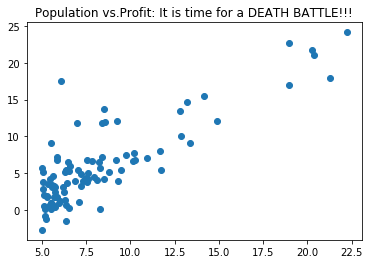

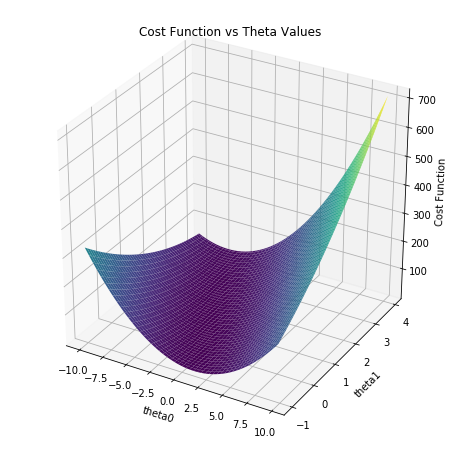

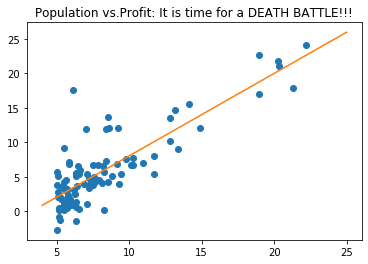

In [6]:
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df=pd.read_csv(URL, names = ['Population', 'Profit']) #Reads info from the URL and name the first coulm Population and the second profi

# Create a Scatter Plot with labeled axis that plots Population (x) vs Profit (y). Create a fun title for this plot.
x = df['Population'] #Sets x to values of population column

y = df['Profit'] #Sets y to values of profit column

plt.plot(x, y, 'o') #Sets x as x-axis, y as y-axis, and uses points to plot data

plt.title('Population vs.Profit: It is time for a DEATH BATTLE!!!')
plt.show()

# Prep your data for machine learning by creating two numpy column vectors
# One should contain x=population the other y=profit
x_numpy_conversion = x.to_numpy() #Converts x values to numpy as we will be using numpy operations

y_numpy_conversion = y.to_numpy() #Converts y vales to numpy

x_pop = x_numpy_conversion.reshape(x_numpy_conversion.size, 1) #Vectorizes the x conversion to a single column
y_prof = y_numpy_conversion.reshape(y_numpy_conversion.size, 1) #Vectorizes the y conversion to a single column

Ones = np.ones((97,1), dtype=int) #Creats a single column of 97 ones

x_pop_2 = np.append(Ones, x_pop, axis = 1) #Adds the x vector to the ones vector
# Compute_Cost function here
# X = x_pop_2 and Y = y

def Cost_Function(X,Y,theta): #CostFunction = ((x*theta - y).T * (x*theta - y)) / 2*m[0] where m is the size of (x*theta - y)
    
    Cost_Component = np.subtract(np.matmul(X, theta), Y) #Sets (x*theta - y)

    m = Cost_Component.shape #Creates m

    Cost_Without_m = np.matmul(Cost_Component.T, Cost_Component) #Sets (x*theta - y).T * (x*theta - y)

    Total_Cost = Cost_Without_m / (2*m[0]) #Whole equation
        
    return Total_Cost #Return J

# Test your cost function here
theta = np.zeros((2,1)) #Create a row of 2 zeros

Cost_Function(x_pop_2, y_prof, theta) #Apply this theta to the cost function

# Code to generate J values
# HINT: use np.arange
theta1 = np.arange(-10,10,0.2) #Creates an array of 50 values between -10 and 10
#print(theta1.shape)

theta2 = np.arange(-1,4,0.05) #Creates an array of 50 values between -1 and 4
#print(theta2.shape)

J = np.zeros((100,100)) #Creates a 100x100 matrix of zeros

for i in range(100):
    for j in range(100):
        theta[0,0] = theta1[i] #Sets multiple arrays of theta, where theta = [theta1, theta2]
        theta[1,0] = theta2[j]
        
        J[i,j] = Cost_Function(x_pop_2, y_prof, theta) #applies each [theta1, theta2] to the cost function
        
# Code to create a surface plot
from mpl_toolkits import mplot3d

# Plot theta0, theta1, cost
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")

theta0vals, theta1vals = np.meshgrid(theta1, theta2)  # make the grid

p = ax.plot_surface(theta0vals, theta1vals, J, cmap='viridis', edgecolor='none')

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost Function')
plt.title("Cost Function vs Theta Values")

plt.savefig('plot3.png', format='png')  # save file as plot3.png
plt.show()

# Normal Equation Calculation = (x.T * x)^-1 * x.T * y
tmp1 = np.linalg.inv(np.matmul(x_pop_2.T,x_pop_2)) #(x.T * x)^-1
#print(tmp1.shape)

tmp2 = np.matmul(x_pop_2.T,y_prof) #x.T * y
#print(tmp2.shape)

thetaFit = np.matmul(tmp1,tmp2) #(x.T * x)^-1 * x.T * y
#print(thetaFit)

# Make plot
plt.plot(x, y, 'o')
plt.title('Population vs.Profit: It is time for a DEATH BATTLE!!!')
# Create the array of x-points for the line
numvals = 10
xpoints = np.array([np.linspace(4,25,numvals)]).T


# Create the array of y-points - using my linear fit (theta) values
# Delete the old vector of ones and create a new one
ones_galore = np.ones_like(xpoints).reshape(-1,1)

# Create the X matrix
Xpoints = np.hstack((ones_galore,xpoints))

# Then my y vales are just X times theta
ypoints = np.matmul(Xpoints,thetaFit)

# Plot the new data
plt.plot(xpoints,ypoints,'-')

### NOTE - the above could also be done with a for loop pluging in x values into y = theta[0]+theta[1]x

plt.show()

# Function that takes population as an input and predicts profit
def Predict_Y(x):
    
    X = np.array([1,x])
    
    y = np.matmul(X,theta)
    
    return y

## Question 2 - Gradient Descent

 - Write a python function that implements the gradient descent algorithm for the data set above.
 - Use your function to find the theta values that minimize the cost: You can initialize with theta = [0,0], 1500 iterations, and alpha = 0.01

NOTE - if you are thinking ahead you might try to make this algorithm completely generally so that it works even if you have more or fewer features in your data set.

In [7]:
#Normal Equation applied to compare thetas
tmp1 = np.linalg.inv(np.matmul(x_pop_2.T,x_pop_2)) #(x.T * x)^-1

tmp2 = np.matmul(x_pop_2.T,y_prof) #x.T * y

thetaFit = np.matmul(tmp1,tmp2)
print(thetaFit)

[[-3.89578088]
 [ 1.19303364]]


In [8]:
# Your gradient descent function here:

def gradientDescent(x, y, theta, alpha, iterations, m):
    """
    This function reads in:
        the feature matrix X 
        the y values - target
        the initial theta values (guess)
        the step size parameter alpha
        the number of iterations you want to run
        and the number of data points or observations in your training data
        
    """
    # your code here
    
    xNormalized = x
    
    #Apply initial cost function with normalized x and theta = [0,0]
    J_0 = Cost_Function(xNormalized, y, theta)
    
    #Sets up an array to place the j values we get for the many iterations
    J_vals = np.zeros((iterations,1))
    New_Theta = theta
    
    for i in range(iterations):
        Factors = (alpha * xNormalized.T)/m #(a*x.T)/m
        
        h = np.matmul(xNormalized, New_Theta) #x * theta
        
        h_minus_Y = np.subtract(h, y) #(h - y)
        
        J_Derivative = np.matmul(Factors, h_minus_Y) #((a*x.T)/m) * (h - y)
        
        New_Theta = New_Theta - J_Derivative #new theta - ((a*x.T)/m) * (h - y)
        
        J_New = Cost_Function(xNormalized, y, New_Theta) #apply our new theta to the cost function
        
        J_vals[i] = J_New #Add new j value to our array of J values
        
            
    return New_Theta, J_vals


In [9]:
# gradient descent parameters:
    # I suggest you use:
        # theta = np.zeros((2, 1))
        # iterations = 1500
        # alpha = 0.01

theta = np.zeros((2, 1)) #Initial theta = [0,0]

#gradient descent results
theta, J_vals = gradientDescent(x_pop_2, y_prof, theta, alpha = 0.01, iterations = 1500, m = len(x_pop_2))
print('Final Theta values')
print(theta)

Final Theta values
[[-3.63029144]
 [ 1.16636235]]


How did your gradient descent do compared with the Normal Equation? They should be pretty close. If you do more itterations it will get closer.

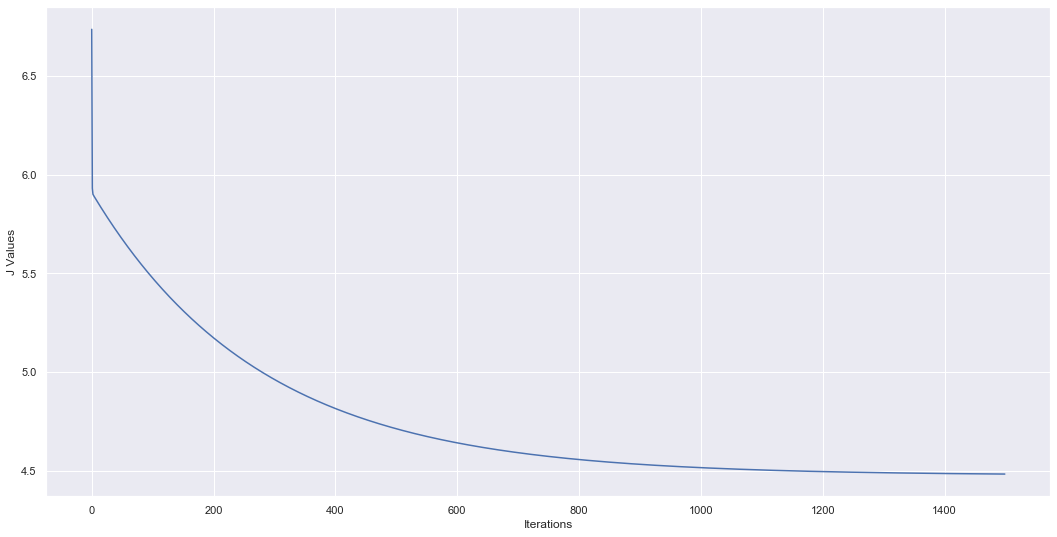

In [26]:
# Plot the Cost as a function of the number of iterations
iterations = 1500
plt.plot(J_vals)
plt.xlabel('Iterations')
plt.ylabel('J Values')
plt.show()

## Question 3 - Full Linear Regression Analysis

Complete a full linear regression analysis on the data set imported below. You should:

- import and explore the data - see information below about the seaborn package
- reduce the number of features to just the most important ones 
- do a linear regression with your gradient descent algorithm on the data to predict the life expectancy as a function of features.

- use your regression variables to predict the life expectancy for a new variable

NOTE: We are still skipping an important idea of validation or crossvalidation. At this point in class we are just assuming that the training went well and we are using the algorithm. NEVER do this in the real world!!!

In [11]:
# Import the data
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData.csv'

df = pd.read_csv(URL)
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   Infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0       0.1  584.259210  33736494.0   
1   58.0               8.18         62.0       0.1  612.696514    327582.0   
2   62.0               8.13         64.0       0.1  631.744976  31731688.0   
3   67.0               8.52         67.0       0.1  669.959000   3696958.0   
4   68.0               7.87         68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

### About the Data

From: https://www.kaggle.com/kumarajarshi/life-expectancy-who/data

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors. 

### Columns:

Country

Year

Status

Developed or Developing status

Life expectancy
Life Expectancy in age

Adult Mortality
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

Infant deaths
Number of Infant Deaths per 1000 population

Alcohol
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percentage expenditure
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles
Measles - number of reported cases per 1000 population

BMI
Average Body Mass Index of entire population

Under-five deaths
Number of under-five deaths per 1000 population

Polio
Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure
General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS
Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP
Gross Domestic Product per capita (in USD)

Population
Population of the country

Thinness 1-19 years
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Thinness 5-9 years
Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling
Number of years of Schooling(years) 

In [12]:
# Use pandas to explore (describe) the stats of the data: max, min, mean, std, quarties
df.describe()

Year  Life expectancy   Adult Mortality  Infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

### Seaborn is a python package for data visualization. Below are a few fun commands.

documentation: https://seaborn.pydata.org/

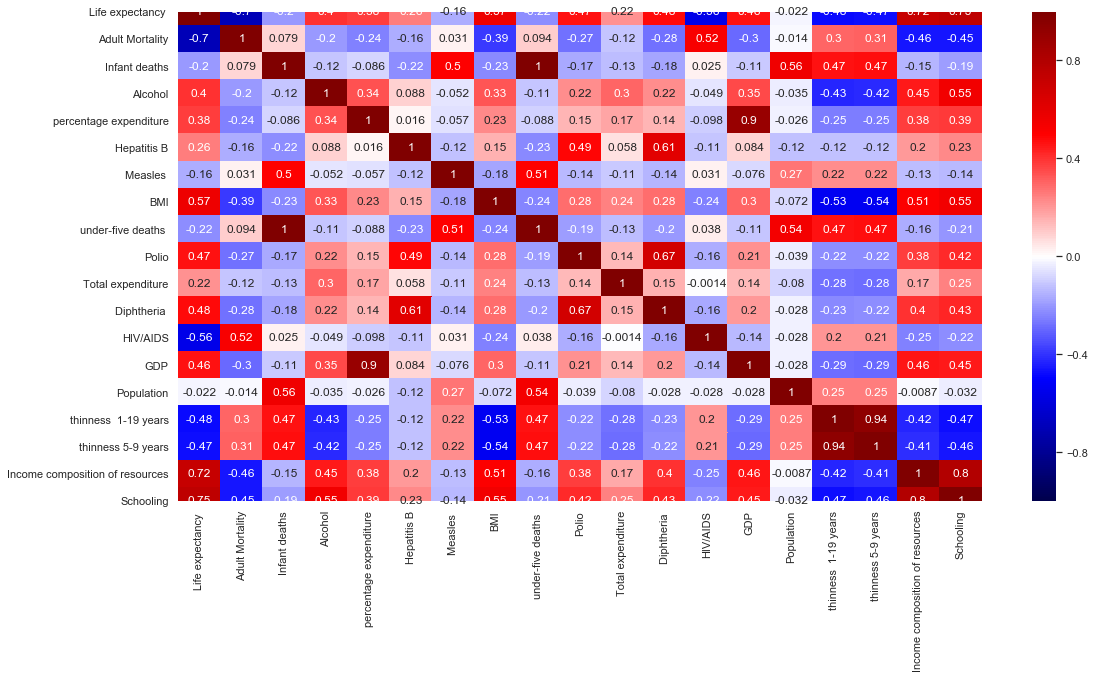

In [13]:
# You should be able to just run this cell!! Assumes df contains the full data set

import seaborn as sns

# Delete the columns in the data frame that contain strings
df.drop('Country', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(18,9)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# This should plot a heat map of correlation constants. The larger the magnitude the bigger the correlation.

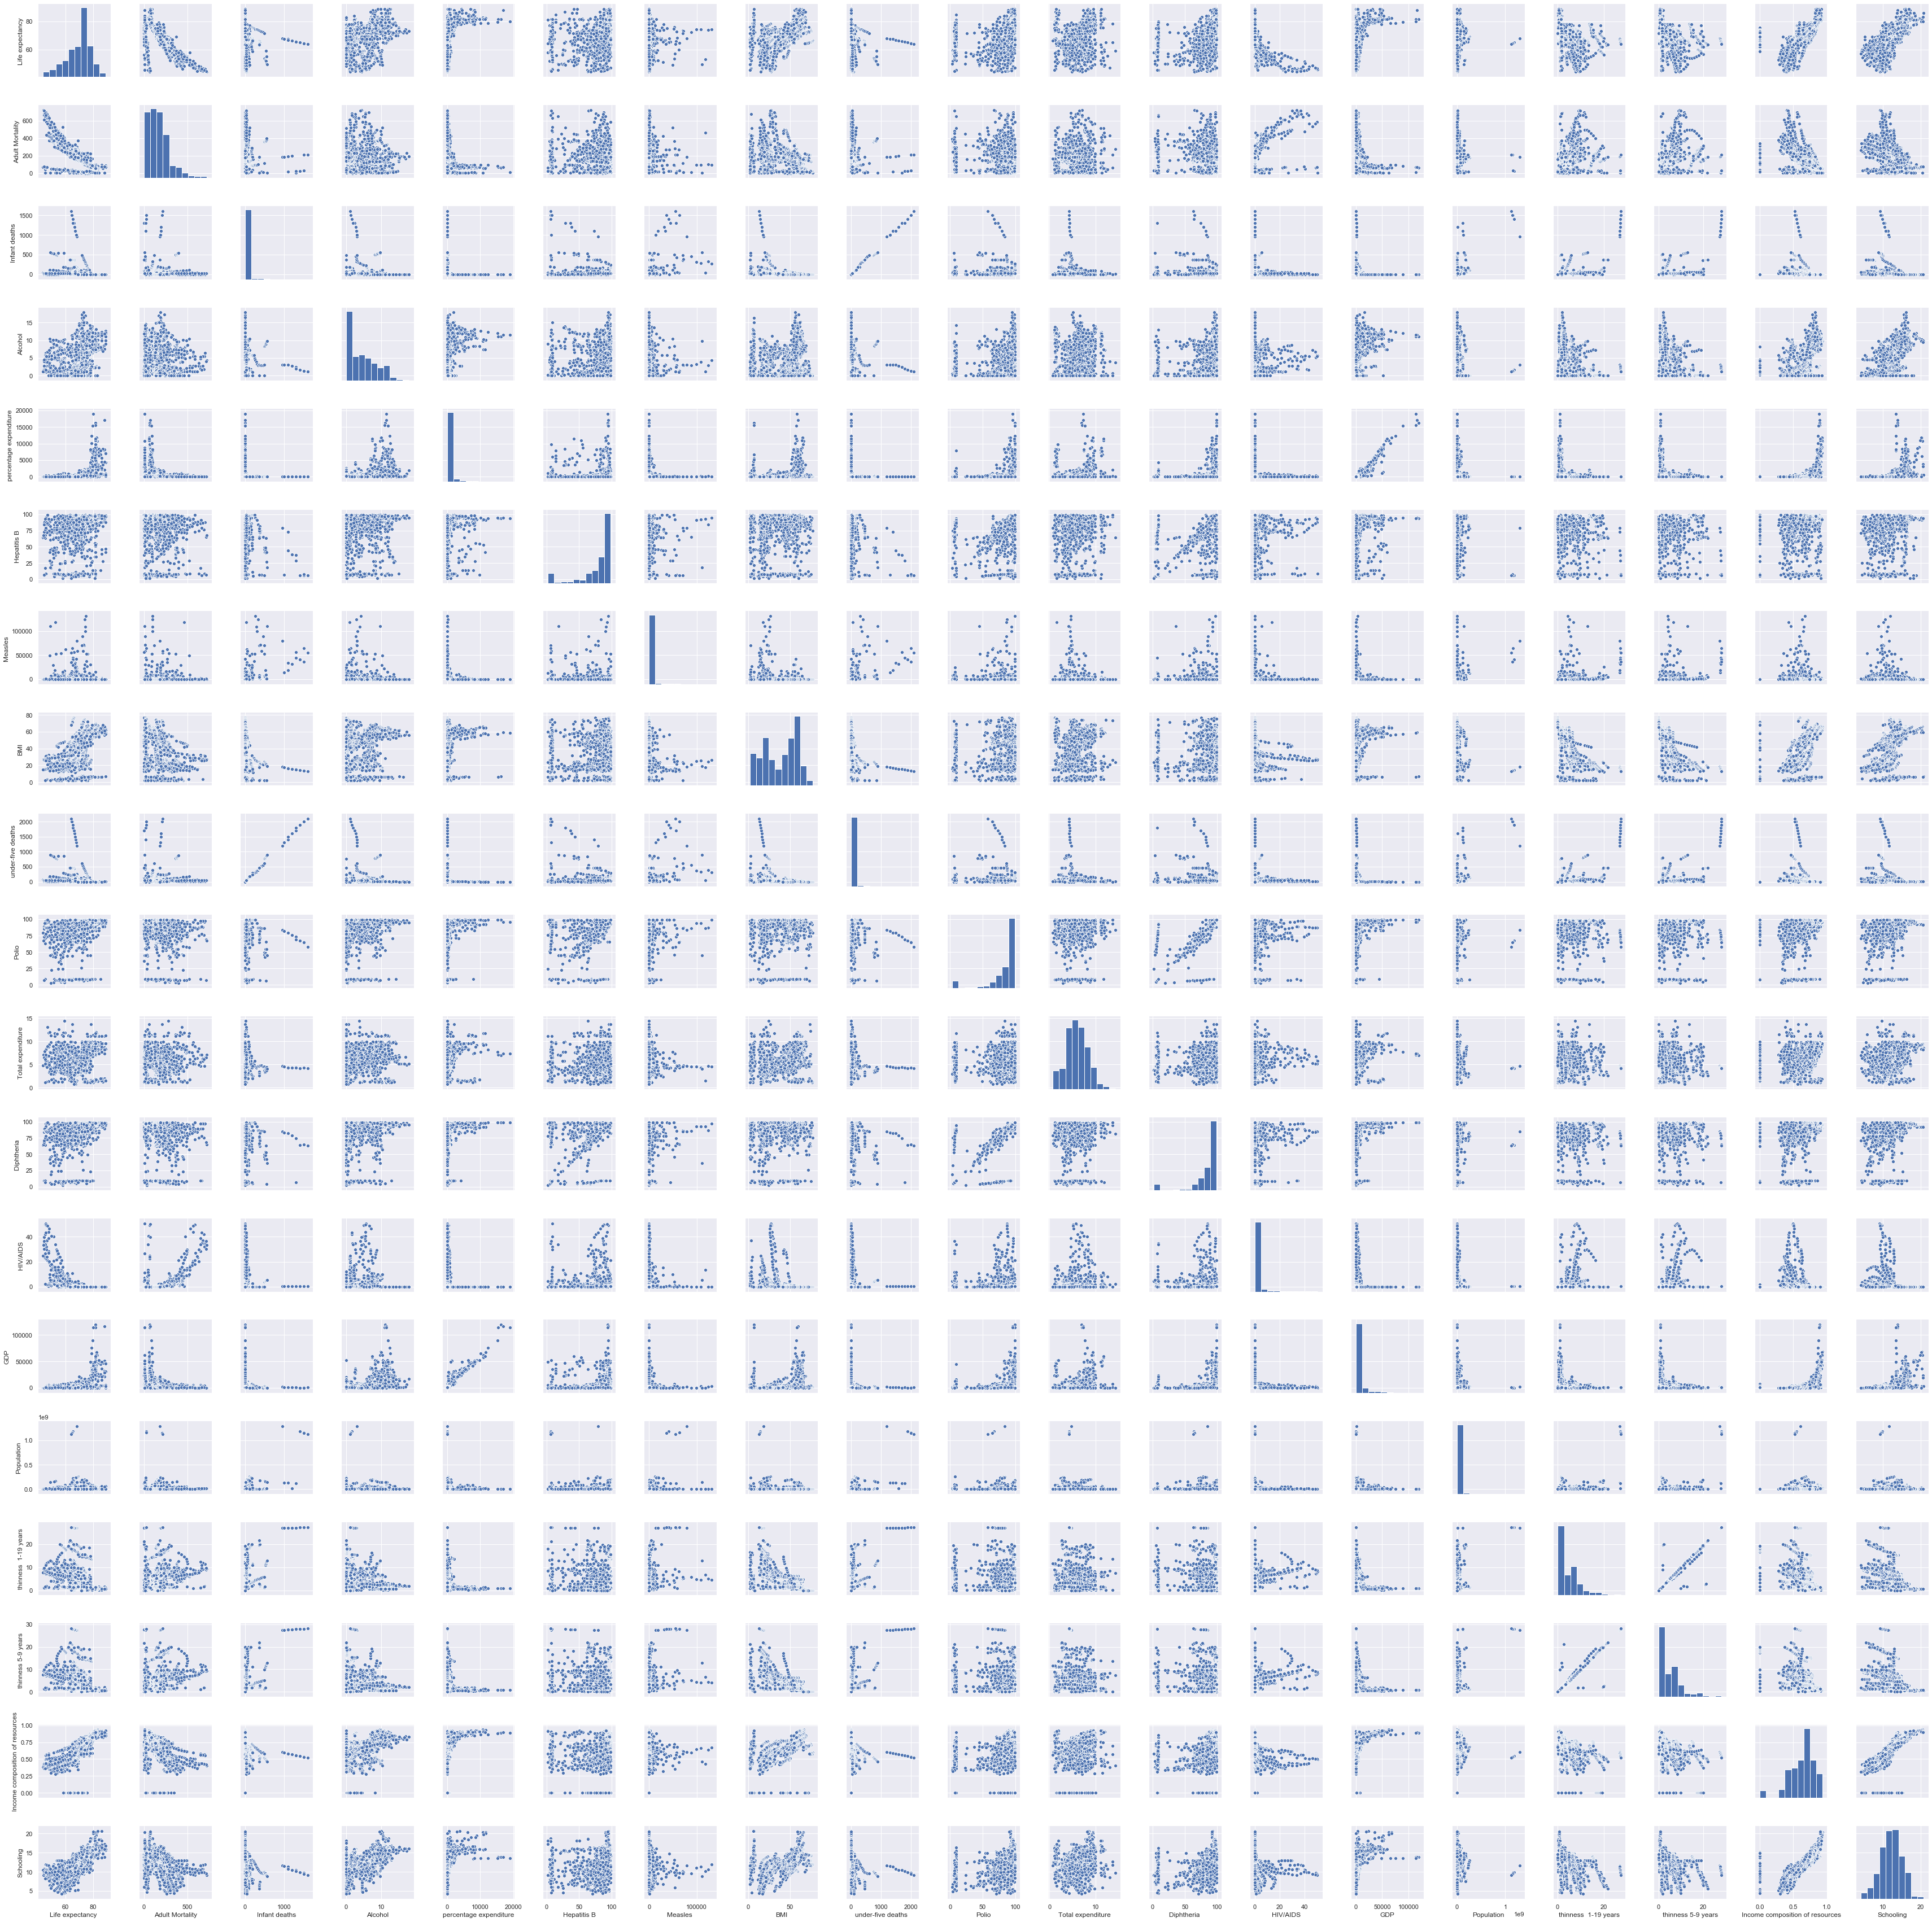

In [14]:
# You should just be able to run this cell!!

# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df,height=2.5)

# This should plot a different scatter plot for each pair of variables

##### At this point you should be looking at the correlation and pairwise plots and looking for things like highly correlated features, features corelated with your target output, outliers, etc. You are trying to think about selecting which features are most important, which features are most important. This is a bit overwhelming, but part of the job.

In [15]:
# Now it's your turn!!!

# Create a new data frame from the old that keeps just 3-5 "important features" YOUR CHOICE!
# Good features for linear regression would be ones that are highly correlated (positive or negative) 
# to your target output and seem to have a linear scatter plot when graphed against your target output.
# in our case the target output is Life Expectancy!

Important_Features =  pd.read_csv(URL, usecols = [0,3,4,17,20,21]) #Imported chart from before, but specific columns

# This is more of an art than a science! If you are really intersted in a more solid foundataion for this 
# TAKE MORE STATISTICS
Important_Features.head()




Country  Life expectancy   Adult Mortality  Population  \
0  Afghanistan              65.0            263.0  33736494.0   
1  Afghanistan              59.9            271.0    327582.0   
2  Afghanistan              59.9            268.0  31731688.0   
3  Afghanistan              59.5            272.0   3696958.0   
4  Afghanistan              59.2            275.0   2978599.0   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

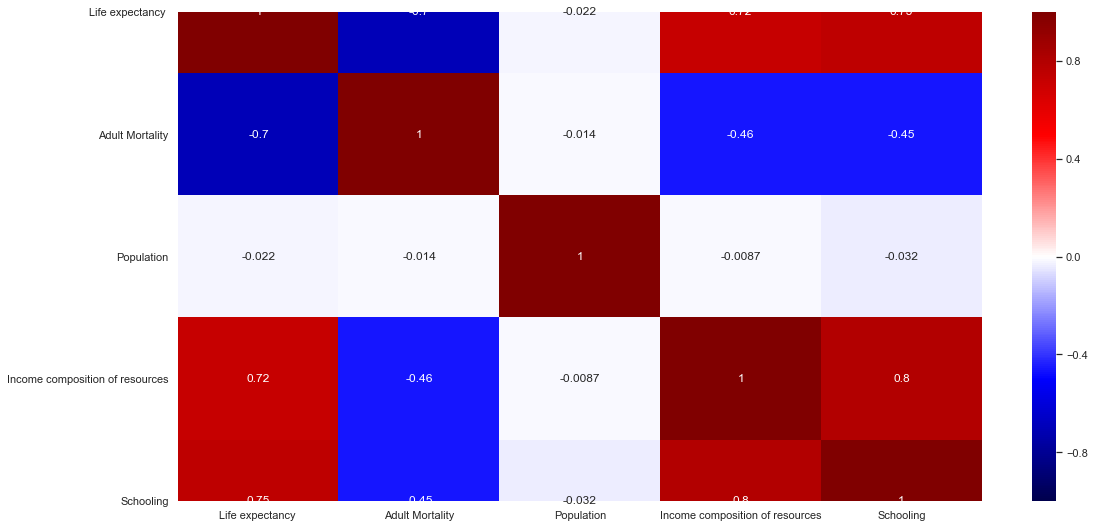

In [16]:
# Visualize the correlation with Seaborn for your reduced number of features data set
# it helps to make the figure size bigger

sns.heatmap(Important_Features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)



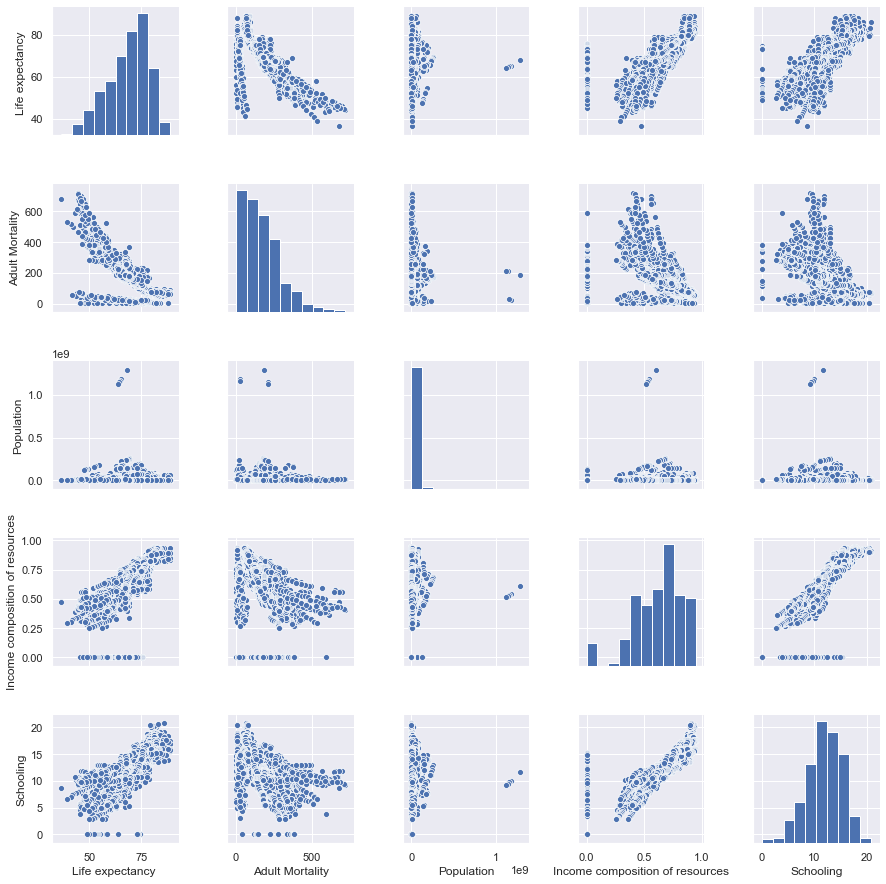

In [17]:
# Plot all of the variable-to-variable relations as scatterplots for your reduced data set
Important_Features.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(Important_Features,height=2.5)


In [18]:
# In this case we need to normalize our features. 
# This means, use "some method" to scale all the features so their magnitudes are closer to the range [-1,1]




# This is not unique, there are lots of ways to do this - you can choose your own method




# Find the scaling values for each column
# Always save your scaling parameters - you will need them when you use your model!!!

#Convert each column to a numpy vector
yLE = Important_Features.iloc[:,1].values.reshape(-1,1)
AM = Important_Features.iloc[:,2].values.reshape(-1,1)
Pop = Important_Features.iloc[:,3].values.reshape(-1,1)
Income = Important_Features.iloc[:,4].values.reshape(-1,1)
Schooled = Important_Features.iloc[:,5].values.reshape(-1,1)



# Then scale/normalize the data

MinAM = np.min(AM,axis=0)
MaxAM = np.max(AM,axis=0)

MinPop = np.min(Pop,axis=0)
MaxPop = np.max(Pop,axis=0)

MinIncome = np.min(Income,axis=0)
MaxIncome = np.max(Income,axis=0)

MinSchooled = np.min(Schooled,axis=0)
MaxSchooled = np.max(Schooled,axis=0)


NormalizedAM = (AM - MinAM)/(MaxAM - MinAM)

NormalizedPop = (Pop - MinPop)/(MaxPop - MinPop)

NormalizedIncome = (Income - MinIncome)/(MaxIncome - MinIncome)

NormalizedSchooled = (Schooled - MinSchooled)/(MaxSchooled - MinSchooled)


# Check the shape of your normalized data
print(yLE.shape, NormalizedAM.shape, NormalizedPop.shape, NormalizedIncome.shape, NormalizedSchooled.shape)

(2284, 1) (2284, 1) (2284, 1) (2284, 1) (2284, 1)


In [27]:
# Create numpy arrays for your features X and your targets y
# Don't forget that first column of ones!
# Always check the shape of your data!

#Add a column of ones for the x's
Ones = np.ones((2284,1), dtype=int)

#Comibines all the x columns, along with a column of 1's
X_Final = np.hstack((Ones, NormalizedAM, NormalizedPop, NormalizedIncome, NormalizedSchooled))


print(X_Final.shape)

(2284, 5)


Final Theta values
(5, 1)


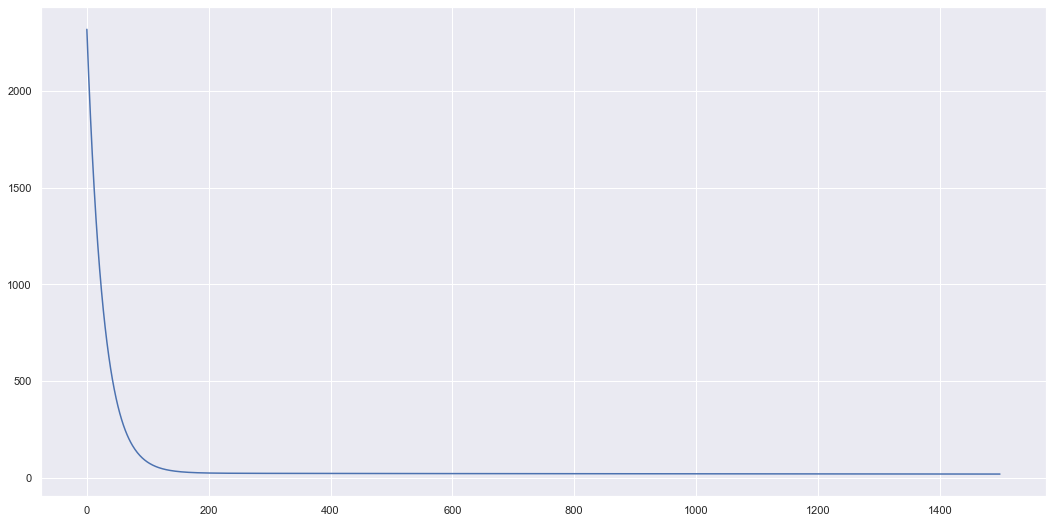

In [20]:
# Use gradient descent to find theta values
# Gradient descent parameters:

theta = np.zeros((5,1))

# Do gradient descent to find theta - you should be able to use your gradient descent function

theta_final, jkl = gradientDescent(X_Final, yLE, theta, alpha = 0.01, iterations = 1500, m = len(XSchooled))

plt.plot(jkl)
theta_final_conversion = np.asarray(theta_final)

print("Final Theta values")
#print(theta_final_conversion)
print(theta_final_conversion.shape)
# Sanity check - What shape should theta be???

### Now import the test data and make predictions - see how well you did using your cost function
 
 NOTE - you can compare your results with your friends - Smaller Cost Fuction WINS!!!

In [21]:
# This is a random subset of the data that was used in training.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData_TestingData.csv'

df_test = pd.read_csv(URL)
df_test.head()

Country  Year      Status  Life expectancy   \
0                            Zambia  2006  Developing              58.0   
1  Saint Vincent and the Grenadines  2001  Developing              79.0   
2                             Sudan  2015  Developing              64.1   
3                          Kiribati  2008  Developing              65.1   
4                             Samoa  2000  Developing              72.0   

   Adult Mortality  Infant deaths  Alcohol  percentage expenditure  \
0              526             33     2.25                1.860004   
1              186              0     4.73                0.000000   
2              225             58      NaN                0.000000   
3               21              0     0.46              167.620155   
4               18              0     3.00               21.254300   

   Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
0         81.0       459  ...     83               6.11           81   
1          NaN         0  ...     99               3.64           99   
2         93.0      3585  ...     93                NaN           93   
3         83.0         0  ...     74              12.23           82   
4         89.0         0  ...     94               5.31           95   

   HIV/AIDS          GDP  Population  thinness  1-19 years  \
0      15.9    13.154199  12383446.0                   7.0   
1       0.7          NaN         NaN                   3.9   
2       0.3  2513.884661   3864783.0                   NaN   
3       0.1  1413.323400      9844.0                   0.2   
4       0.1   154.689230     17461.0                   0.2   

   thinness 5-9 years  Income composition of resources  Schooling  
0                 6.9                            0.479       10.9  
1                 3.9                            0.673       12.8  
2                 NaN                            0.488        7.2  
3                 0.1                            0.572       11.6  
4                 0.2                            0.640       12.1  

[5 rows x 22 columns]

In [22]:
# Select just the features you used and the target output in x and y

Important_Features2 =  pd.read_csv(URL, usecols = [0,3,4,17,20,21])
Important_Features2.head()


# Delete all rows that contain NaN or not numbers
Important_Features2.dropna(inplace=True)


# Normalize the test data the same way you did above - use the same scale parameters
# Then scale/normalize the data
yLE2 = Important_Features2.iloc[:,1].values.reshape(-1,1)
AM2 = Important_Features2.iloc[:,2].values.reshape(-1,1)
Pop2 = Important_Features2.iloc[:,3].values.reshape(-1,1)
Income2 = Important_Features2.iloc[:,4].values.reshape(-1,1)
Schooled2 = Important_Features2.iloc[:,5].values.reshape(-1,1)



# Then scale/normalize the data

MinAM2 = np.min(AM2,axis=0)
MaxAM2 = np.max(AM2,axis=0)

MinPop2 = np.min(Pop2,axis=0)
MaxPop2 = np.max(Pop2,axis=0)

MinIncome2 = np.min(Income2,axis=0)
MaxIncome2 = np.max(Income2,axis=0)

MinSchooled2 = np.min(Schooled2,axis=0)
MaxSchooled2 = np.max(Schooled2,axis=0)

NormalizedAM2 = (AM2 - MinAM2)/(MaxAM2 - MinAM2)

NormalizedPop2 = (Pop2 - MinPop2)/(MaxPop2 - MinPop2)

NormalizedIncome2 = (Income2 - MinIncome2)/(MaxIncome2 - MinIncome2)

NormalizedSchooled2 = (Schooled2 - MinSchooled2)/(MaxSchooled2 - MinSchooled2)


# Check the shape of your normalized data
print(yLE2.shape, NormalizedAM2.shape, NormalizedPop2.shape, NormalizedIncome2.shape, NormalizedSchooled2.shape)


# Create your xtest matrix and ytest vector
Ones2 = np.ones((NormalizedAM2.size,1), dtype=int)

X_Final2 = np.hstack((Ones2, NormalizedAM2, NormalizedPop2, NormalizedIncome2, NormalizedSchooled2))
print(X_Final2.shape)






(22, 1) (22, 1) (22, 1) (22, 1) (22, 1)
(22, 5)


In [23]:
# Calculate the cost function using the test values
# You already wrote this function in PART1
Cost_Function(X_Final2, yLE2, theta_final_conversion)



array([[27.45856305]])

In [24]:
# Write a function that will make predictions for you
def predict(x,theta):
    # Your code here
    ans = np.matmul(x,theta)
    
    return ans

ypred_scaled = predict(X_Final2,theta_final_conversion)
print(ypred_scaled)

[[64.30152232]
 [57.10259615]
 [67.82187416]
 [70.66602827]
 [60.41076945]
 [49.40924811]
 [72.84099619]
 [81.33379333]
 [44.54153481]
 [76.55213575]
 [56.77204904]
 [66.36032199]
 [71.25078218]
 [75.60699177]
 [73.64405508]
 [70.18354389]
 [60.74386998]
 [60.49184941]
 [86.41362466]
 [58.32253768]
 [54.81697389]
 [68.10422334]]


In [25]:
# Print the difference between your predictions and the real values
difference = np.subtract(yLE2, ypred_scaled)
print(difference)

[[ -6.30152232]
 [  6.99740385]
 [ -2.72187416]
 [  1.33397173]
 [ -5.71076945]
 [ 19.59075189]
 [  2.55900381]
 [ -4.83379333]
 [  3.15846519]
 [ -4.15213575]
 [  1.82795096]
 [  6.63967801]
 [ -2.75078218]
 [ -2.20699177]
 [ -0.14405508]
 [  3.11645611]
 [ -5.94386998]
 [  4.20815059]
 [ -1.41362466]
 [  5.87746232]
 [  8.08302611]
 [-20.30422334]]


### How did you do? Who got the smallest cost value on their test data? What did you change or play around with to reduce the cost? Which predictions were the worst?

In [ ]:
print('I did alright. I toyed around with the various attributes that I found to be relevant to the life expectancy. If anything')
print('Probably next time I might not include linear as a function that seems vertical.')